# Iterator and Iterables

## Iterables

- The simplest definition of an __iterable__ is __Any object that can be looped over is an iterable object.__
- i.e. list, tuple, dict, string, set.

### However it is not that simple.

- In python in order for an object to be __iterable__ it must implement \_\_iter\_\_ method.
- \_\_iter\_\_ is expexted to return an __Iterator__ object
- Thus, An __iterable__ object is an object that implements \_\_iter\_\_
- Which brings us over to our next question what is an __Iterator__?

## Iterator

- An __iterator__ is an object that implements \_\_next\_\_ method.
- Which is expected to return the __next element of the iterable object__ that returned it.
- Raise a __StopIteration exception__ when no more elements are available.
- To clarify things in details let's see how the for loop in python works.

# The internals of for loop

In [2]:
a_list = [1, 2, 3, 4, 5, 6]
for item in a_list:
    print(item, end=' ')

1 2 3 4 5 6 

__Let's take a look at what above loop does:__

1. The loop will get the __iterator__ object of the list as list in python implements \_\_iter\_\_ method.
2. Then \_\_next\_\_ method will be called on that __iterator__ object and it returns the next element of the list.
3. This goes on until all the elements of the list are retrieved.
4. When there are no more elements left \_\_next\_\_ method will raise StopIteration exception and loop terminates.

In [3]:
# if we try to implement above steps without using for loop.

iterator = iter(a_list)
while True:
    try:
        print(next(iterator), end=' ')
    except StopIteration:
        break

1 2 3 4 5 6 

- You can see that first we aquired the __iterator__ object of the list.
- Then in the while we are calling \_\_next\_\_ method over that __iterator__ object.
- As far as there are elements in the list it returns next element.
- Once the elements are exhausted, exception is raised and loop breaks.

# Let's create our very own Iterable

__Let's keep few things in mind:__

- For an object to be __iterable__ it should implement \_\_iter\_\_ method.
- \_\_iter\_\_ should return an __iterator__.
- Calling \_\_next\_\_ on this __iterator__ object should return next element of the __iterable__.

In [5]:
class Team:
    '''
    Contains List of Junior team members and also overrides the __iter__() function.
    '''
    def __init__(self):
        self._junior_members = []
  
    def add_junior_members(self, members):
        self._junior_members += members
  
    def __iter__(self):
        ''' Returns the Iterator object '''
        return TeamIterator(self)

class TeamIterator:
    ''' Iterator class '''
    def __init__(self, team):
        # Team object reference
        self._team = team
        # member variable to keep track of current index
        self._index = 0
 
    def __next__(self):
        ''''Returns the next value from team object's lists '''
        if self._index < len(self._team._junior_members) :
            
            result = self._team._junior_members[self._index]
            
            self._index += 1
            return result
        
        # End of Iteration
        raise StopIteration
    def __iter__(self):
        return self

In [7]:
team = Team()

team.add_junior_members(['Sam', 'John', 'Marshal'])

for member in team:
    print(member)
    
print("Sam" in team)

Sam
John
Marshal
True


## Simplifying the custom iterator

- In the simplest case the __iterable__ will implement next itself and return self in __iter__.
- In our team class we are manipulating list.
- Thus, instead of writing our own __Iterator__ class we can use __iterator__ of the __list__ itself.
- In our class TeamIterator we are checking index and returning element of a __list__.
- However we can get rid of it and just return the next item of list by calling \_\_next\_\_ on __iterator__ of that list.

In [8]:
class Team:
    '''
    Contains List of Junior and senior team members and also overrides the __iter__() function.
    '''
    def __init__(self):
        self._junior_members = list()
  
    def add_junior_members(self, members):
        self._junior_members += members
  
    def __iter__(self):
        ''' Returns the Iterator object '''
        return iter(self._junior_members)
    
    def __next__(self):
        return next(self)

In [9]:
team = Team()

team.add_junior_members(['Sam', 'John', 'Marshal'])

for member in team:
    print(member)

Sam
John
Marshal


# Conclusion

- An object is __iterable__ only if it implements \_\_iter\_\_ method.
- \_\_iter\_\_ must return an __iterator__ object.
- The __iterator__ class must implement \_\_next\_\_ method.
- \_\_next\_\_ must return the next element of it's __iterable__.
- __Iterator__ class also implements \_\_iter\_\_ method but returns itself when it is called.

__Which would mean that__

- Every __iterator__ object is an __iterable__ (cause it implements \_\_iter\_\_ method).
- But every __iterable__ is not an __iterator__ (it does not necessarily implement next method).

__Key points__

- When __iterables__ are used in loop it's __iterator__ object is used.
- When __iterator__ object has no more items the loop stops (by raising StopIteration method).
- All __itrators__ and __itrables__ can be looped over (because __iterator__ also implements \_\_iter\_\_ method)

__Key differences and similarities__

| ITERABLE                          	| ITERATOR                                                                                	|
|:-----------------------------------	|:-----------------------------------------------------------------------------------------	|
| Implements __iter__ method        	| Implements __next__ method                                                              	|
| You can loop over it              	| You can loop over it                                                                    	|
| len() will return number of items 	| You can not call len() on it                                                            	|
| You can not call next() on it     	| next() will return next element of it's iterable                                        	|
| Contains all the elements in it   	| Does not contain any element but retrieves them at run time from it's iterable when next method is called 	|

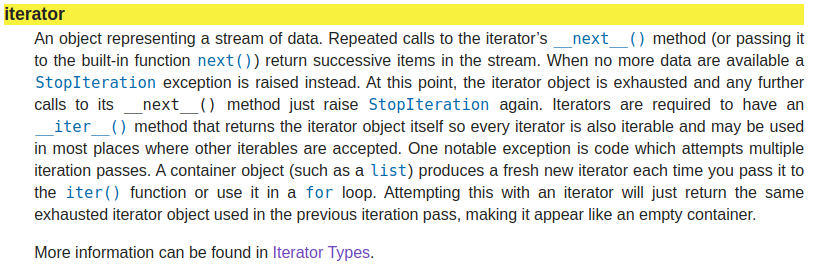